train_00.json 1256


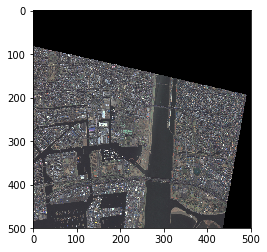

train_01.json 259


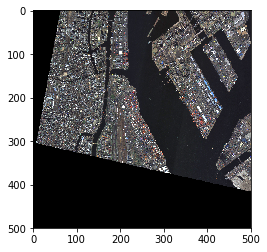

train_02.json 59


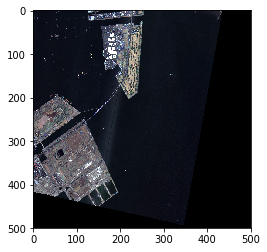

train_03.json 584


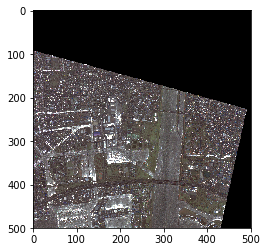

train_04.json 152


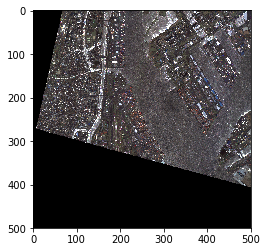

train_05.json 37


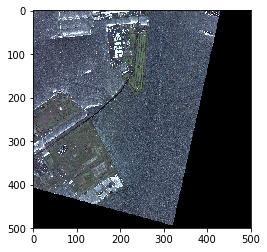

train_06.json 238


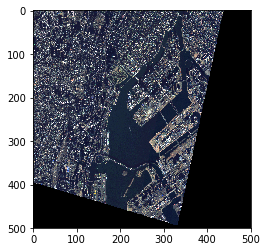

train_07.json 1184


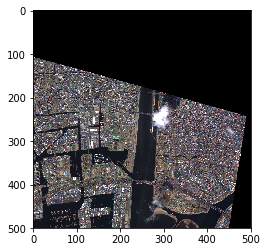

train_08.json 245


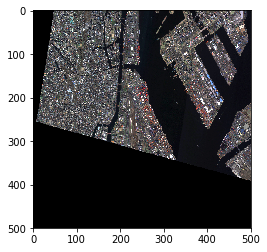

train_09.json 46


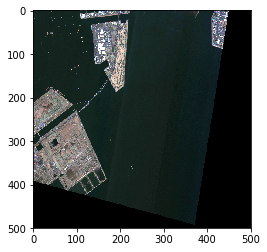

train_10.json 1311


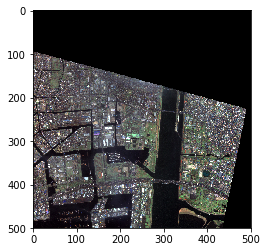

train_11.json 263


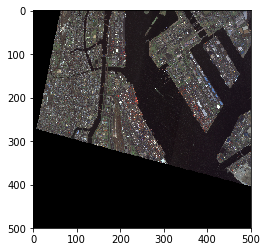

train_12.json 57


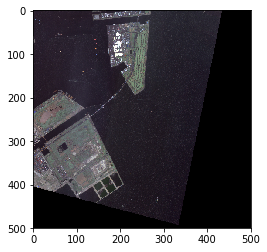

train_13.json 1127


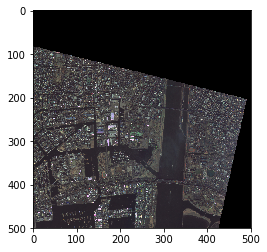

train_14.json 275


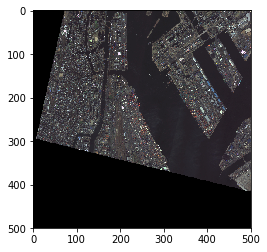

train_15.json 87


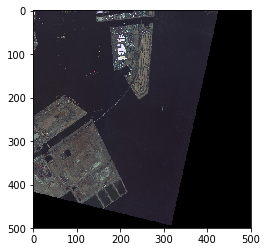

train_16.json 305


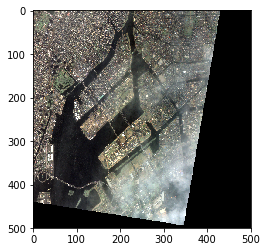

train_17.json 1316


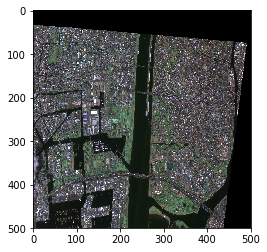

train_18.json 105


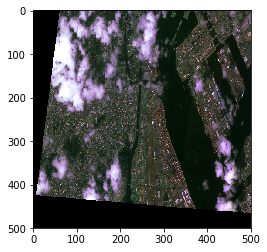

train_19.json 75


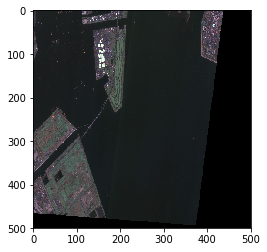

In [2]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

Image.MAX_IMAGE_PIXELS = 1000000000

for i in range(20) :
    file = 'train_'+ str(i).zfill(2) +'.json'
    f = open('train_annotations/' + file)
    json_dict = json.load(f)
    print(file,len(json_dict['labels']))
    file = 'train_'+ str(i).zfill(2) +'.jpg'
    #f = open('train_images/' + file)
    img = Image.open('train_images/' + file)
    img = img.resize([500,500])
    plt.imshow(img)
    plt.show()
    

In [14]:
L = 416

i = 0
file = 'train_'+ str(i).zfill(2) +'.jpg'
img = np.array(Image.open('train_images/' + file))
imgs = []
print(img.shape)
for i in range(int(img.shape[0]/L)):
    for j in range(int(img.shape[1]/L)):
        s_img = img[i*L:(i+1)*L,j*L:(j+1)*L,:]
        if np.sum(s_img)>0:
            s_img = Image.fromarray(s_img)
            imgs.append(s_img)
            #plt.imshow(s_img)
            #plt.show()
print(len(imgs))

(12194, 13752, 3)
676


In [34]:
import json

L = 416

def fd(d):
    result = []
    b = d['box2d']
    if (int(b['x1']/L)==int(b['x2']/L)and(int(b['y1']/L)==int(b['y2']/L))):
        result.append(int(b['x1']/L))
        result.append(int(b['x1']/L))
    else:
        result.append(-1)
        result.append(-1)
    cls_dic = {'ship_moving':0,'ship_not_moving':1,'barge':2}
    result.append(cls_dic[d['category']])
    return result

i = 0
file = 'train_'+ str(i).zfill(2) +'.json'
f = open('train_annotations/' + file)
json_dict = json.load(f)
#print(json_dict['labels'][0])
for i in range(10):
    print(fd(json_dict['labels'][i]))



[-1, -1, 1]
[18, 18, 1]
[18, 18, 1]
[18, 18, 1]
[18, 18, 1]
[18, 18, 1]
[18, 18, 1]
[18, 18, 1]
[18, 18, 1]
[17, 17, 1]


In [22]:
for i in range(100):
    print(json_dict['labels'][i])

{'category': 'ship_not_moving', 'box2d': {'x1': 7814, 'y1': 3682, 'x2': 7839, 'y2': 3745}}
{'category': 'ship_not_moving', 'box2d': {'x1': 7791, 'y1': 3595, 'x2': 7805, 'y2': 3633}}
{'category': 'ship_not_moving', 'box2d': {'x1': 7791, 'y1': 3694, 'x2': 7802, 'y2': 3731}}
{'category': 'ship_not_moving', 'box2d': {'x1': 7784, 'y1': 3791, 'x2': 7795, 'y2': 3810}}
{'category': 'ship_not_moving', 'box2d': {'x1': 7803, 'y1': 3777, 'x2': 7819, 'y2': 3821}}
{'category': 'ship_not_moving', 'box2d': {'x1': 7781, 'y1': 3710, 'x2': 7788, 'y2': 3722}}
{'category': 'ship_not_moving', 'box2d': {'x1': 7787, 'y1': 3717, 'x2': 7793, 'y2': 3727}}
{'category': 'ship_not_moving', 'box2d': {'x1': 7586, 'y1': 7639, 'x2': 7609, 'y2': 7666}}
{'category': 'ship_not_moving', 'box2d': {'x1': 7488, 'y1': 7680, 'x2': 7508, 'y2': 7694}}
{'category': 'ship_not_moving', 'box2d': {'x1': 7465, 'y1': 8020, 'x2': 7482, 'y2': 8052}}
{'category': 'barge', 'box2d': {'x1': 7418, 'y1': 7937, 'x2': 7468, 'y2': 8033}}
{'categor

In [35]:
import matplotlib.pyplot as plt
from PIL import Image,ImageDraw

img = Image.open('COCO_train2014_000000000049.jpg')
img = img.resize([414,414])
draw = ImageDraw.Draw(img)

f = open('COCO_train2014_000000000049.txt')
text = f.read()
for s in text.split('\n'):
    if s!='':
        v = s.split(' ')
        draw.rectangle(((int(float(v[1])*414))-(int(float(v[3])*414*0.5)),(int(float(v[2])*414))-(int(float(v[4])*414*0.5)),\
                        (int(float(v[1])*414))+(int(float(v[3])*414*0.5)),(int(float(v[2])*414))+(int(float(v[4])*414*0.5))),outline=(0,0,0))
print(text)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'COCO_train2014_000000000049.jpg'